## System setup

---


##### Importing modules


In [1]:
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.callbacks import (
    TensorBoard,
    ModelCheckpoint,
    EarlyStopping,
    ReduceLROnPlateau,
)

from toolkit.classes import DataSet, ImageProcessor, Augmenter, Model

from tensorflow.keras.layers import BatchNormalization


2023-01-29 01:09:33.041046: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-29 01:09:34.926651: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-01-29 01:09:34.926745: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-01-29 01:09:40.565627: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

## Read dataset

---


##### Create image dataframe


In [2]:
images = DataSet()

In [3]:
datasets = ["raw", "data", "augmented", "preprocessed"]
for dataset in datasets:
    images.update_dataset(dataset=dataset)


Found 150 images in ./raw/Train/Non defective/
Found 150 images in ./raw/Train/Defective/
Found 31 images in ./raw/Validation/Non defective/
Found 31 images in ./raw/Validation/Defective/
Found 11 images in ./raw/Test/Non defective/
Found 11 images in ./raw/Test/Defective/
Found 150 images in ./data/Train/Non defective/
Found 150 images in ./data/Train/Defective/
Found 31 images in ./data/Validation/Non defective/
Found 31 images in ./data/Validation/Defective/
Found 11 images in ./data/Test/Non defective/
Found 11 images in ./data/Test/Defective/
Found 25 images in ./augmented/Train/Non defective/
Found 25 images in ./augmented/Train/Defective/
Found 150 images in ./preprocessed/Train/Non defective/
Found 150 images in ./preprocessed/Train/Defective/
Found 31 images in ./preprocessed/Validation/Non defective/
Found 31 images in ./preprocessed/Validation/Defective/
Found 11 images in ./preprocessed/Test/Non defective/
Found 11 images in ./preprocessed/Test/Defective/


## Data augmentation

---


In [4]:
N_augmented = 25

In [5]:
image_augmenter = Augmenter(N_augmented, images.data)
image_augmenter.remove_old_data(images.augmented_folder)
image_augmenter.augment_images()
del image_augmenter
images.update_dataset("augmented")
images.augmented


100%|██████████| 25/25 [00:12<00:00,  2.07it/s]


Found 25 images in ./augmented/Train/Non defective/
Found 25 images in ./augmented/Train/Defective/


,type,defect,defect_str,path,filename,img,height,width,components,R_mean,G_mean,B_mean
0,train,0,Non defective,./augmented/Train/Non defective/,59_augmented.jpg,./augmented/Train/Non defective/59_augmented.jpg,0,0,0,0.0,0.0,0.0
1,train,0,Non defective,./augmented/Train/Non defective/,104_augmented.jpg,./augmented/Train/Non defective/104_augmented.jpg,0,0,0,0.0,0.0,0.0
2,train,0,Non defective,./augmented/Train/Non defective/,45_augmented.jpg,./augmented/Train/Non defective/45_augmented.jpg,0,0,0,0.0,0.0,0.0
3,train,0,Non defective,./augmented/Train/Non defective/,74_augmented.jpg,./augmented/Train/Non defective/74_augmented.jpg,0,0,0,0.0,0.0,0.0
4,train,0,Non defective,./augmented/Train/Non defective/,34_augmented.jpg,./augmented/Train/Non defective/34_augmented.jpg,0,0,0,0.0,0.0,0.0
5,train,0,Non defective,./augmented/Train/Non defective/,107_augmented.jpg,./augmented/Train/Non defective/107_augmented.jpg,0,0,0,0.0,0.0,0.0
6,train,0,Non defective,./augmented/Train/Non defective/,33_augmented.jpg,./augmented/Train/Non defective/33_augmented.jpg,0,0,0,0.0,0.0,0.0
7,train,0,Non defective,./augmented/Train/Non defective/,137_augmented.jpg,./augmented/Train/Non defective/137_augmented.jpg,0,0,0,0.0,0.0,0.0
8,train,0,Non defective,./augmented/Train/Non defective/,36_augmented.jpg,./augmented/Train/Non defective/36_augmented.jpg,0,0,0,0.0,0.0,0.0
9,train,0,Non defective,./augmented/Train/Non defective/,122_augmented.jpg,./augmented/Train/Non defective/122_augmented.jpg,0,0,0,0.0,0.0,0.0


## Image processing

---


In [6]:
img_height = 224
img_width = 224

preprocessing_steps = [
    "original",
    "resize",
    "save",
]

preprocessing_kwargs = {
    "crop": {"ratio": 0.1},
    "resize": {"height": img_height, "width": img_width},
    "hist_eq": {
        "type": "CLAHE",
        "size": (16, 16),
    },
    "noise_filt": {"type": "median", "size": 11},
    "Laplacian": {"size": 5},
    "Canny": {"low": 100, "high": 200},
    "Hough": {"minLineLength": 10, "maxLineGap": 20},
    "feat_detect": {"type": "ORB"},
}


In [7]:
image_processor = ImageProcessor(steps=preprocessing_steps, kwargs=preprocessing_kwargs)
image_processor.remove_old_data(images.preprocessed_folder)
image_processor.process_images(images.data)
image_processor.process_images(images.augmented)
del image_processor


50it [00:42,  1.18it/s]


## Model build

---


##### Construct neural network


In [8]:
CNN = Model("ResNet50_pretrained")

CNN.epochs = 1000
CNN.batch_size = 32


CNN.optimizer = Adam(learning_rate=0.0001)

CNN.callbacks = [
    TensorBoard(log_dir="./logs", write_images=True),
    ModelCheckpoint(
        f"./models/{CNN.name}.h5",
        monitor="val_accuracy",
        verbose=1,
        save_best_only=True,
        save_weights_only=False,
        mode="auto",
        save_freq="epoch",
    ),
    EarlyStopping(
        monitor="val_accuracy",
        patience=50,
        verbose=1,
        mode="auto",
        restore_best_weights=True,
    ),
    ReduceLROnPlateau(
        monitor="val_accuracy",
        factor=0.1,
        patience=10,
        verbose=1,
        mode="auto",
        min_lr=0.000005,
    ),
]

CNN.load_datasets(color_mode="rgb")
CNN.build_model()
CNN.compile_model()
CNN.pretrained_model.summary()
CNN.model.summary()


2023-01-29 01:11:51.360433: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:267] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2023-01-29 01:11:51.360488: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (tomcom): /proc/driver/nvidia/version does not exist
2023-01-29 01:11:51.379886: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Found 350 files belonging to 2 classes.
Found 62 files belonging to 2 classes.
Found 22 files belonging to 2 classes.
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                       

##### Train


In [9]:
CNN.train_net()


Epoch 1/1000
11/11 [==============================] - ETA: 0s - loss: 0.7539 - accuracy: 0.4714
Epoch 1: val_accuracy improved from -inf to 0.50000, saving model to ./models/ResNet50_pretrained.h5
11/11 [==============================] - 49s 4s/step - loss: 0.7539 - accuracy: 0.4714 - val_loss: 0.7613 - val_accuracy: 0.5000 - lr: 1.0000e-04
Epoch 2/1000
11/11 [==============================] - ETA: 0s - loss: 0.7087 - accuracy: 0.5143
Epoch 2: val_accuracy did not improve from 0.50000
11/11 [==============================] - 73s 6s/step - loss: 0.7087 - accuracy: 0.5143 - val_loss: 0.7020 - val_accuracy: 0.5000 - lr: 1.0000e-04
Epoch 3/1000
11/11 [==============================] - ETA: 0s - loss: 0.6945 - accuracy: 0.5114
Epoch 3: val_accuracy did not improve from 0.50000
11/11 [==============================] - 68s 7s/step - loss: 0.6945 - accuracy: 0.5114 - val_loss: 0.7003 - val_accuracy: 0.5000 - lr: 1.0000e-04
Epoch 4/1000
11/11 [==============================] - ETA: 0s - loss: 0

##### Predict


In [10]:
CNN.predict_test()


1/1 [==============================] - 3s 3s/step
Test values:          [0 1 1 0 0 0 1 0 0 0 1 1 1 1 1 1 0 1 1 0 0 0]
Predicted values:     [0 1 0 0 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 0 0 1]


##### Metrics


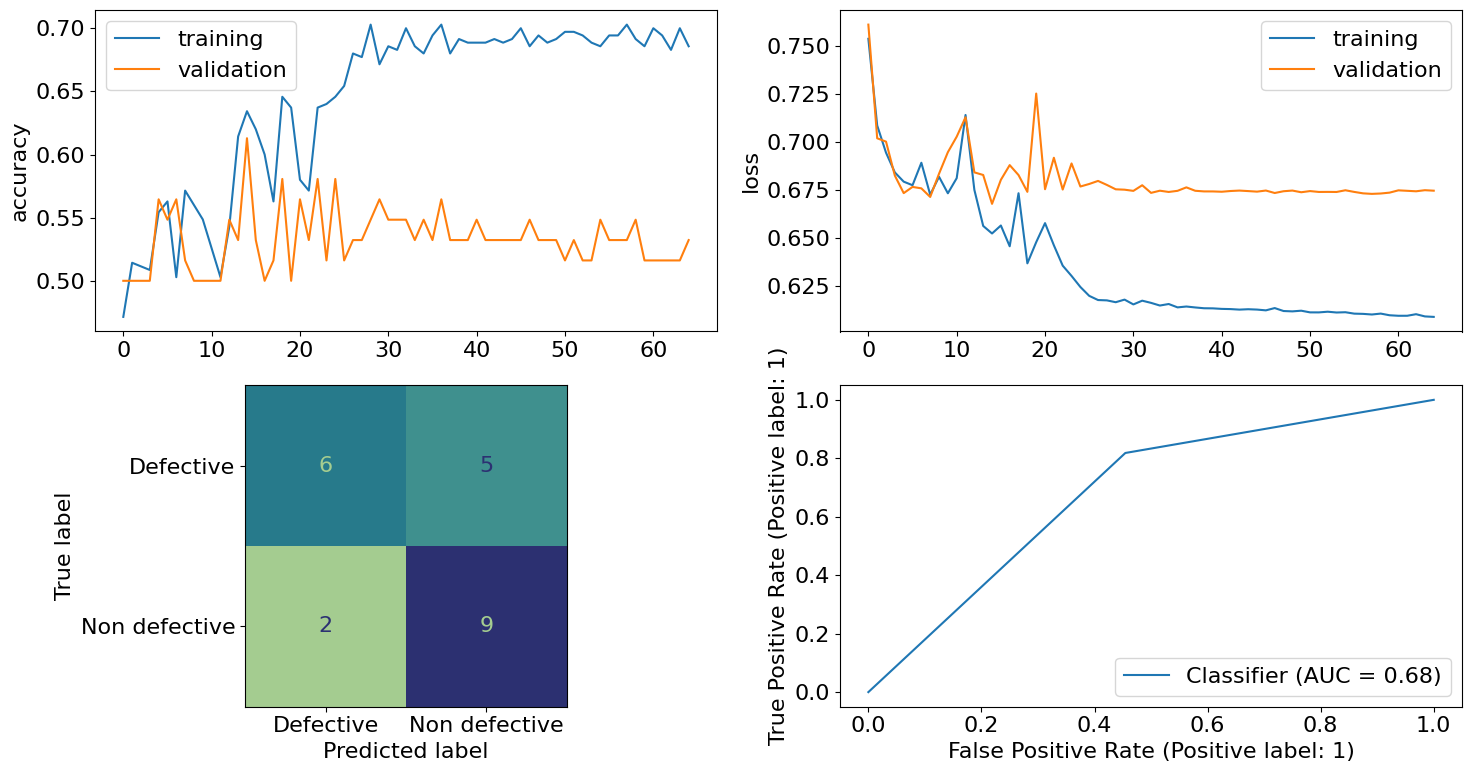

In [11]:
CNN.show_metrics(save_folder=images.plot_folder)


#### Fine tuning


In [14]:
CNN = Model("ResNet50_pretrained")

CNN.epochs = 1000
CNN.batch_size = 32

CNN.optimizer = Adam(learning_rate=0.00001)

CNN.callbacks = [
    TensorBoard(log_dir="./logs", write_images=True),
    ModelCheckpoint(
        f"./models/{CNN.name}_finetuned.h5",
        monitor="val_accuracy",
        verbose=1,
        save_best_only=True,
        save_weights_only=False,
        mode="auto",
        save_freq="epoch",
    ),
    EarlyStopping(
        monitor="val_accuracy",
        patience=25,
        verbose=1,
        mode="auto",
        restore_best_weights=True,
    ),
    ReduceLROnPlateau(
        monitor="val_accuracy",
        factor=0.1,
        patience=1,
        verbose=1,
        mode="auto",
        min_lr=0.000001,
    ),
]


CNN.load_datasets(color_mode="rgb")
CNN.build_model()
CNN.model.load_weights(f"./models/{CNN.name}.h5")
CNN.pretrained_model.trainable = True
for layer in CNN.pretrained_model.layers:
    layer.trainable = not isinstance(layer, BatchNormalization)
CNN.compile_model()
CNN.pretrained_model.summary()
CNN.model.summary()


Found 350 files belonging to 2 classes.
Found 62 files belonging to 2 classes.
Found 22 files belonging to 2 classes.
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_4[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                       

In [15]:
CNN.train_net()

Epoch 1/1000
11/11 [==============================] - ETA: 0s - loss: 0.7185 - accuracy: 0.4714 
Epoch 1: val_accuracy improved from -inf to 0.50000, saving model to ./models/ResNet50_pretrained_finetuned.h5
11/11 [==============================] - 147s 12s/step - loss: 0.7185 - accuracy: 0.4714 - val_loss: 0.6952 - val_accuracy: 0.5000 - lr: 1.0000e-05
Epoch 2/1000
11/11 [==============================] - ETA: 0s - loss: 0.6987 - accuracy: 0.4629 
Epoch 2: val_accuracy did not improve from 0.50000

Epoch 2: ReduceLROnPlateau reducing learning rate to 1e-06.
11/11 [==============================] - 165s 15s/step - loss: 0.6987 - accuracy: 0.4629 - val_loss: 0.6962 - val_accuracy: 0.5000 - lr: 1.0000e-05
Epoch 3/1000
11/11 [==============================] - ETA: 0s - loss: 0.6903 - accuracy: 0.5371 
Epoch 3: val_accuracy did not improve from 0.50000
11/11 [==============================] - 191s 17s/step - loss: 0.6903 - accuracy: 0.5371 - val_loss: 0.6962 - val_accuracy: 0.4032 - lr: 1.

In [16]:
CNN.predict_test()

1/1 [==============================] - 3s 3s/step
Test values:          [1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 1 1 0 1 1 1 1]
Predicted values:     [1 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 1 1 1]


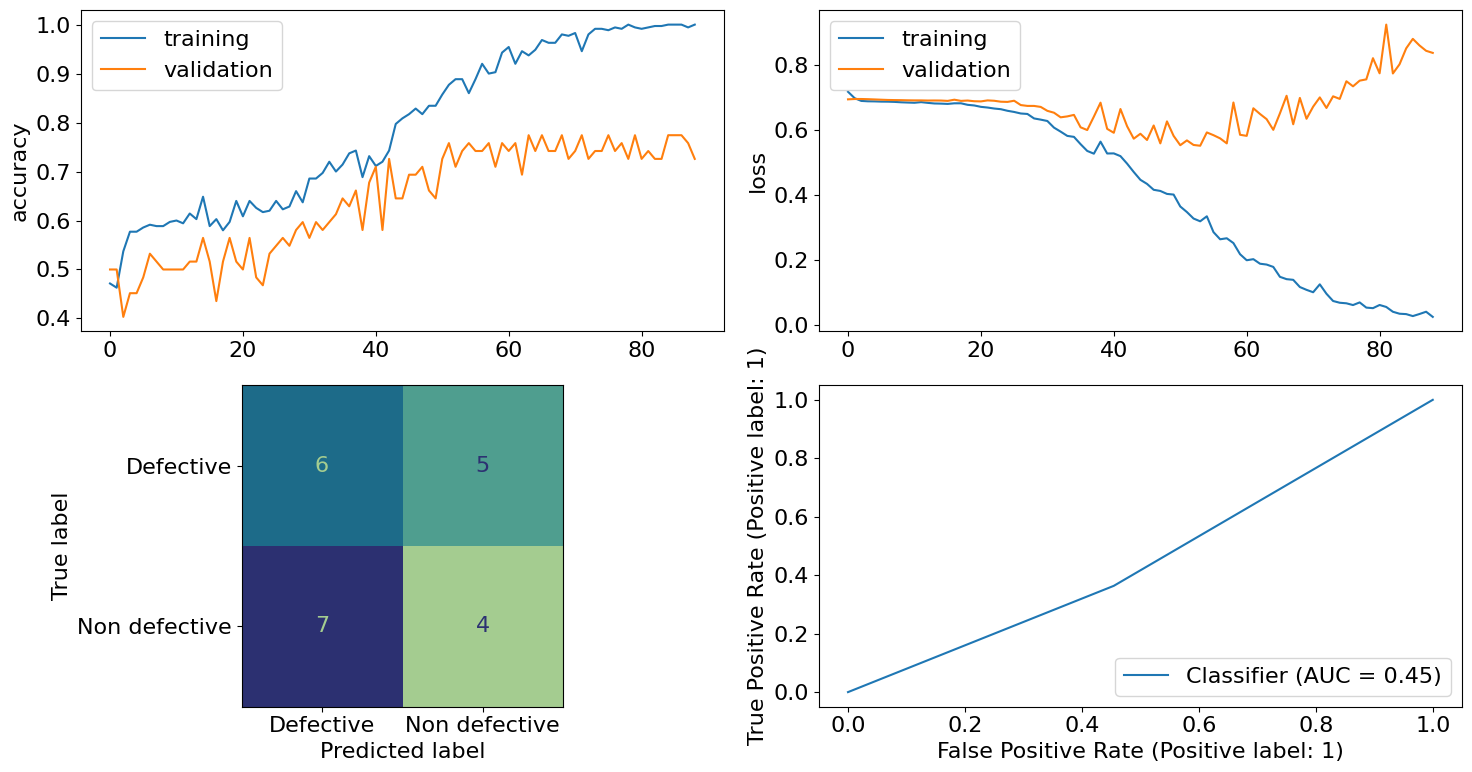

In [17]:
CNN.show_metrics(save_folder=images.plot_folder)

#### Run with tuned learning rate


Found 350 files belonging to 2 classes.
Found 62 files belonging to 2 classes.
Found 22 files belonging to 2 classes.
Epoch 1/40
11/11 [==============================] - ETA: 0s - loss: 0.6962 - accuracy: 0.5257
Epoch 1: val_accuracy improved from -inf to 0.59677, saving model to ./models/ResNet50_pretrained_LR.h5
11/11 [==============================] - 34s 3s/step - loss: 0.6962 - accuracy: 0.5257 - val_loss: 0.6841 - val_accuracy: 0.5968
Epoch 2/40
11/11 [==============================] - ETA: 0s - loss: 0.7003 - accuracy: 0.5029
Epoch 2: val_accuracy improved from 0.59677 to 0.67742, saving model to ./models/ResNet50_pretrained_LR.h5
11/11 [==============================] - 32s 3s/step - loss: 0.7003 - accuracy: 0.5029 - val_loss: 0.6771 - val_accuracy: 0.6774
Epoch 3/40
11/11 [==============================] - ETA: 0s - loss: 0.6856 - accuracy: 0.5571
Epoch 3: val_accuracy did not improve from 0.67742
11/11 [==============================] - 51s 4s/step - loss: 0.6856 - accuracy: 

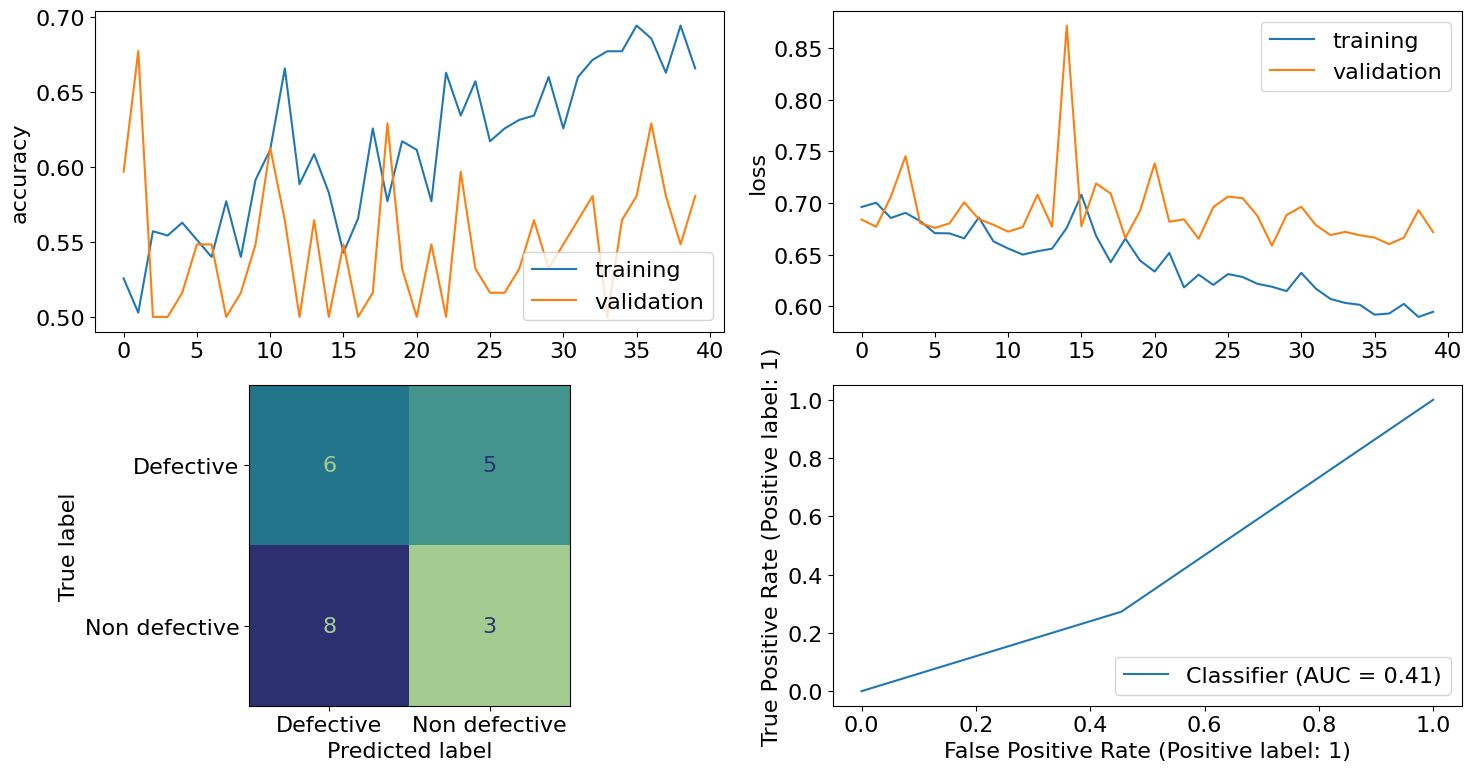

In [18]:
CNN = Model("ResNet50_pretrained")

CNN.epochs = 40
CNN.batch_size = 32

CNN.optimizer = Adam(learning_rate=0.00010898427617324405)

CNN.callbacks = [
    TensorBoard(log_dir="./logs"),
    ModelCheckpoint(
        f"./models/{CNN.name}_LR.h5",
        monitor="val_accuracy",
        verbose=1,
        save_best_only=True,
        save_weights_only=False,
        mode="auto",
        save_freq="epoch",
    ),
]

CNN.load_datasets(color_mode="rgb")
CNN.build_model()
CNN.compile_model()
CNN.train_net()
CNN.model.load_weights("./models/ResNet50_pretrained_LR.h5")
CNN.predict_test()
CNN.show_metrics(save_folder=images.plot_folder, postfix="LR")


Found 350 files belonging to 2 classes.
Found 62 files belonging to 2 classes.
Found 22 files belonging to 2 classes.
Epoch 1/60
11/11 [==============================] - ETA: 0s - loss: 0.6789 - accuracy: 0.5771 
Epoch 1: val_accuracy improved from -inf to 0.66129, saving model to ./models/ResNet50_pretrained_finetuned_LR.h5
11/11 [==============================] - 187s 16s/step - loss: 0.6789 - accuracy: 0.5771 - val_loss: 0.6771 - val_accuracy: 0.6613
Epoch 2/60
11/11 [==============================] - ETA: 0s - loss: 0.6787 - accuracy: 0.5771 
Epoch 2: val_accuracy did not improve from 0.66129
11/11 [==============================] - 202s 17s/step - loss: 0.6787 - accuracy: 0.5771 - val_loss: 0.6772 - val_accuracy: 0.6613
Epoch 3/60
11/11 [==============================] - ETA: 0s - loss: 0.6786 - accuracy: 0.5829 
Epoch 3: val_accuracy did not improve from 0.66129
11/11 [==============================] - 192s 17s/step - loss: 0.6786 - accuracy: 0.5829 - val_loss: 0.6771 - val_accur

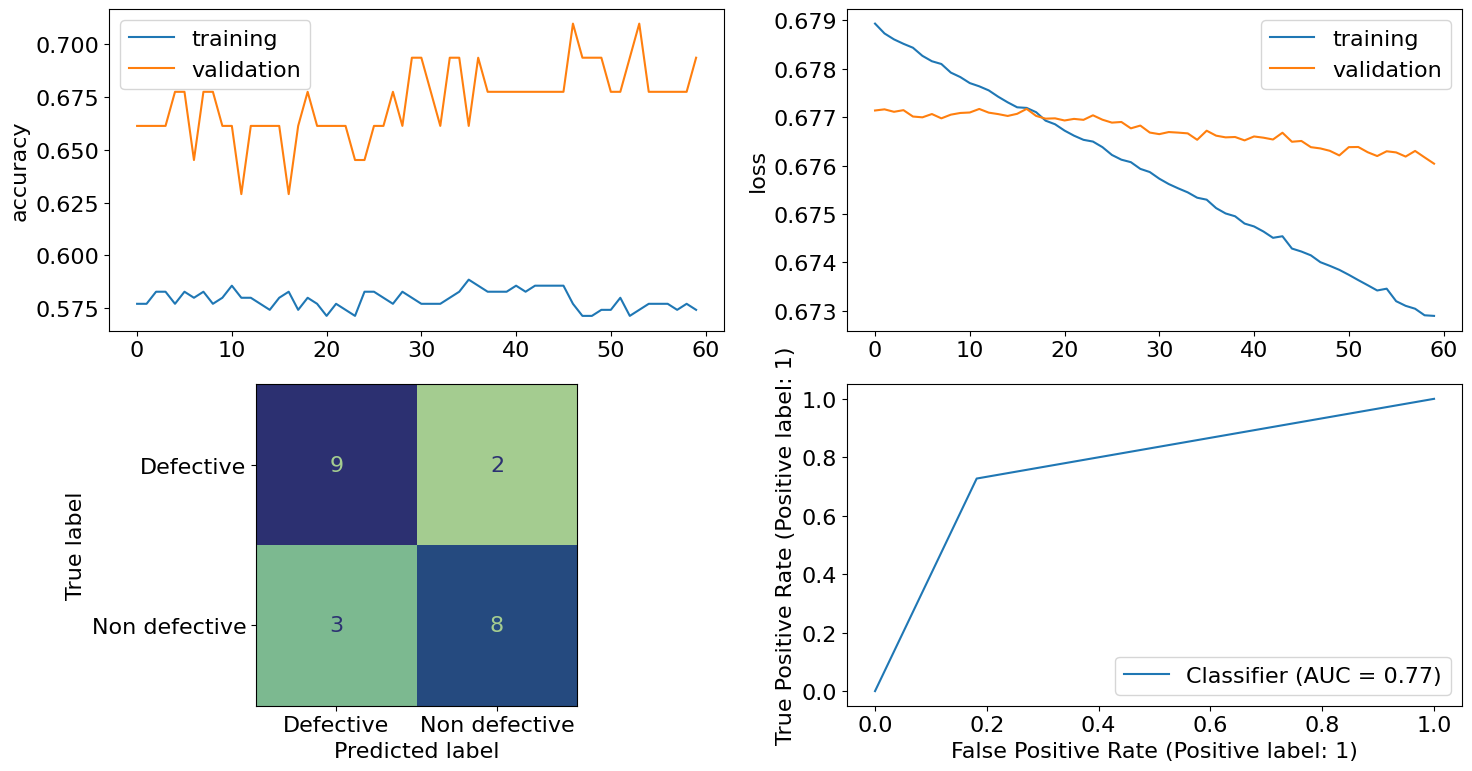

In [19]:
CNN = Model("ResNet50_pretrained")

CNN.epochs = 60
CNN.batch_size = 32

CNN.optimizer = Adam(learning_rate=2.2000693929233267e-08)

CNN.callbacks = [
    TensorBoard(log_dir="./logs"),
    ModelCheckpoint(
        f"./models/{CNN.name}_finetuned_LR.h5",
        monitor="val_accuracy",
        verbose=1,
        save_best_only=True,
        save_weights_only=False,
        mode="auto",
        save_freq="epoch",
    ),
]

CNN.load_datasets(color_mode="rgb")
CNN.build_model()
CNN.model.load_weights(f"./models/{CNN.name}_LR.h5")
CNN.pretrained_model.trainable = True
for layer in CNN.pretrained_model.layers:
    layer.trainable = not isinstance(layer, BatchNormalization)
CNN.compile_model()
CNN.train_net()
CNN.predict_test()
CNN.show_metrics(save_folder=images.plot_folder, postfix="finetuned_LR")


#### Bootstrapping


In [20]:
import numpy as np
import pandas as pd

from sklearn.metrics import accuracy_score


In [21]:
CNN.remove_augmented_data(images.preprocessed_folder)
images.update_dataset(dataset="preprocessed")


Found 150 images in ./preprocessed/Train/Non defective/
Found 150 images in ./preprocessed/Train/Defective/
Found 31 images in ./preprocessed/Validation/Non defective/
Found 31 images in ./preprocessed/Validation/Defective/
Found 11 images in ./preprocessed/Test/Non defective/
Found 11 images in ./preprocessed/Test/Defective/


In [22]:
N_bootstrap = 10
cols = ["loss", "accuracy", "val_loss", "val_accuracy", "test_accuracy"]
results = pd.DataFrame(columns=cols)
single_result = {}

for _ in range(N_bootstrap):
    resampled = images.preprocessed.copy()
    type_list = resampled.type.copy()
    for cl in set(resampled.defect_str):
        indices = np.array(resampled[resampled.defect_str == cl].index)
        np.random.shuffle(indices)
        train_idx = indices[:150]
        validation_idx = indices[150:181]
        test_idx = indices[181:]
        type_list[train_idx] = "train"
        type_list[validation_idx] = "validation"
        type_list[test_idx] = "test"
    resampled.type = type_list

    image_augmenter = Augmenter(N_augmented, images.data)
    image_augmenter.remove_old_data(images.augmented_folder)
    image_augmenter.augment_images()
    del image_augmenter
    images.update_dataset("augmented")
    resampled = pd.concat([resampled, images.augmented])

    image_processor = ImageProcessor(
        steps=preprocessing_steps,
        kwargs=preprocessing_kwargs,
        save_folder="./augmented/",
    )
    image_processor.process_images(images.augmented)
    del image_processor

    CNN = Model("ResNet50_pretrained")

    CNN.epochs = 20
    CNN.batch_size = 32

    CNN.optimizer = Adam(learning_rate=0.00010898427617324405)

    CNN.callbacks = [
        TensorBoard(log_dir="./logs", write_images=True),
        ModelCheckpoint(
            f"./models/{CNN.name}_bootstrap.h5",
            monitor="val_accuracy",
            verbose=1,
            save_best_only=True,
            save_weights_only=False,
            mode="auto",
            save_freq="epoch",
        ),
    ]

    CNN.load_datasets(color_mode="rgb", resample=True, df_images=resampled)
    CNN.build_model()
    # CNN.pretrained_model.trainable = True
    # for layer in CNN.pretrained_model.layers:
    #     layer.trainable = not isinstance(layer, BatchNormalization)
    CNN.compile_model()
    CNN.model.load_weights(f"./models/{CNN.name}_LR.h5")
    CNN.train_net()
    best_idx = np.argmax(CNN.history.history["val_accuracy"])
    for col in cols[:4]:
        single_result[col] = CNN.history.history[col][best_idx]
    CNN.model.load_weights(f"./models/{CNN.name}_bootstrap.h5")

    CNN.predictions = CNN.model.predict(CNN.data["Test"])
    CNN.y_pred = (1 * (CNN.predictions > 0.5)).ravel()
    CNN.y_true = list(CNN.data["Test"][0][-1])
    single_result["test_accuracy"] = accuracy_score(CNN.y_true, CNN.y_pred)
    results = pd.concat([results, pd.DataFrame([single_result])])

display(results)
results.describe()


100%|██████████| 25/25 [00:07<00:00,  3.27it/s]


Found 25 images in ./augmented/Train/Non defective/
Found 25 images in ./augmented/Train/Defective/


50it [00:23,  2.11it/s]


Found 350 validated image filenames belonging to 2 classes.
Found 62 validated image filenames belonging to 2 classes.
Found 22 validated image filenames belonging to 2 classes.
Epoch 1/20
11/11 [==============================] - ETA: 0s - loss: 0.7057 - accuracy: 0.5486
Epoch 1: val_accuracy improved from -inf to 0.50000, saving model to ./models/ResNet50_pretrained_bootstrap.h5
11/11 [==============================] - 36s 3s/step - loss: 0.7057 - accuracy: 0.5486 - val_loss: 0.6838 - val_accuracy: 0.5000
Epoch 2/20
11/11 [==============================] - ETA: 0s - loss: 0.6814 - accuracy: 0.5371
Epoch 2: val_accuracy improved from 0.50000 to 0.53226, saving model to ./models/ResNet50_pretrained_bootstrap.h5
11/11 [==============================] - 31s 3s/step - loss: 0.6814 - accuracy: 0.5371 - val_loss: 0.6812 - val_accuracy: 0.5323
Epoch 3/20
11/11 [==============================] - ETA: 0s - loss: 0.6717 - accuracy: 0.6057
Epoch 3: val_accuracy improved from 0.53226 to 0.62903, s

100%|██████████| 25/25 [00:06<00:00,  3.72it/s]


Found 25 images in ./augmented/Train/Non defective/
Found 25 images in ./augmented/Train/Defective/


50it [00:20,  2.41it/s]


Found 350 validated image filenames belonging to 2 classes.
Found 62 validated image filenames belonging to 2 classes.
Found 22 validated image filenames belonging to 2 classes.
Epoch 1/20
11/11 [==============================] - ETA: 0s - loss: 0.7345 - accuracy: 0.5000
Epoch 1: val_accuracy improved from -inf to 0.50000, saving model to ./models/ResNet50_pretrained_bootstrap.h5
11/11 [==============================] - 55s 5s/step - loss: 0.7345 - accuracy: 0.5000 - val_loss: 0.7542 - val_accuracy: 0.5000
Epoch 2/20
11/11 [==============================] - ETA: 0s - loss: 0.7066 - accuracy: 0.5171
Epoch 2: val_accuracy did not improve from 0.50000
11/11 [==============================] - 28s 3s/step - loss: 0.7066 - accuracy: 0.5171 - val_loss: 0.6839 - val_accuracy: 0.5000
Epoch 3/20
11/11 [==============================] - ETA: 0s - loss: 0.6920 - accuracy: 0.5400
Epoch 3: val_accuracy improved from 0.50000 to 0.58065, saving model to ./models/ResNet50_pretrained_bootstrap.h5
11/11 

100%|██████████| 25/25 [00:10<00:00,  2.46it/s]


Found 25 images in ./augmented/Train/Non defective/
Found 25 images in ./augmented/Train/Defective/


50it [00:19,  2.59it/s]


Found 350 validated image filenames belonging to 2 classes.
Found 62 validated image filenames belonging to 2 classes.
Found 22 validated image filenames belonging to 2 classes.
Epoch 1/20
11/11 [==============================] - ETA: 0s - loss: 0.7560 - accuracy: 0.5314
Epoch 1: val_accuracy improved from -inf to 0.50000, saving model to ./models/ResNet50_pretrained_bootstrap.h5
11/11 [==============================] - 33s 3s/step - loss: 0.7560 - accuracy: 0.5314 - val_loss: 0.7523 - val_accuracy: 0.5000
Epoch 2/20
11/11 [==============================] - ETA: 0s - loss: 0.7425 - accuracy: 0.4714
Epoch 2: val_accuracy improved from 0.50000 to 0.53226, saving model to ./models/ResNet50_pretrained_bootstrap.h5
11/11 [==============================] - 38s 3s/step - loss: 0.7425 - accuracy: 0.4714 - val_loss: 0.6841 - val_accuracy: 0.5323
Epoch 3/20
11/11 [==============================] - ETA: 0s - loss: 0.6814 - accuracy: 0.5829
Epoch 3: val_accuracy did not improve from 0.53226
11/11 

100%|██████████| 25/25 [00:08<00:00,  2.91it/s]


Found 25 images in ./augmented/Train/Non defective/
Found 25 images in ./augmented/Train/Defective/


50it [00:37,  1.34it/s]


Found 350 validated image filenames belonging to 2 classes.
Found 62 validated image filenames belonging to 2 classes.
Found 22 validated image filenames belonging to 2 classes.
Epoch 1/20
11/11 [==============================] - ETA: 0s - loss: 0.7306 - accuracy: 0.5000
Epoch 1: val_accuracy improved from -inf to 0.50000, saving model to ./models/ResNet50_pretrained_bootstrap.h5
11/11 [==============================] - 66s 6s/step - loss: 0.7306 - accuracy: 0.5000 - val_loss: 0.6966 - val_accuracy: 0.5000
Epoch 2/20
11/11 [==============================] - ETA: 0s - loss: 0.6840 - accuracy: 0.5600
Epoch 2: val_accuracy improved from 0.50000 to 0.51613, saving model to ./models/ResNet50_pretrained_bootstrap.h5
11/11 [==============================] - 61s 6s/step - loss: 0.6840 - accuracy: 0.5600 - val_loss: 0.6904 - val_accuracy: 0.5161
Epoch 3/20
11/11 [==============================] - ETA: 0s - loss: 0.6812 - accuracy: 0.5629
Epoch 3: val_accuracy improved from 0.51613 to 0.61290, s

100%|██████████| 25/25 [00:05<00:00,  4.93it/s]


Found 25 images in ./augmented/Train/Non defective/
Found 25 images in ./augmented/Train/Defective/


50it [00:17,  2.79it/s]


Found 350 validated image filenames belonging to 2 classes.
Found 62 validated image filenames belonging to 2 classes.
Found 22 validated image filenames belonging to 2 classes.
Epoch 1/20
11/11 [==============================] - ETA: 0s - loss: 0.7134 - accuracy: 0.5000
Epoch 1: val_accuracy improved from -inf to 0.50000, saving model to ./models/ResNet50_pretrained_bootstrap.h5
11/11 [==============================] - 57s 5s/step - loss: 0.7134 - accuracy: 0.5000 - val_loss: 0.6970 - val_accuracy: 0.5000
Epoch 2/20
11/11 [==============================] - ETA: 0s - loss: 0.6819 - accuracy: 0.5571
Epoch 2: val_accuracy improved from 0.50000 to 0.59677, saving model to ./models/ResNet50_pretrained_bootstrap.h5
11/11 [==============================] - 35s 3s/step - loss: 0.6819 - accuracy: 0.5571 - val_loss: 0.6772 - val_accuracy: 0.5968
Epoch 3/20
11/11 [==============================] - ETA: 0s - loss: 0.6831 - accuracy: 0.5400
Epoch 3: val_accuracy did not improve from 0.59677
11/11 

100%|██████████| 25/25 [00:17<00:00,  1.39it/s]


Found 25 images in ./augmented/Train/Non defective/
Found 25 images in ./augmented/Train/Defective/


50it [00:21,  2.37it/s]


Found 350 validated image filenames belonging to 2 classes.
Found 62 validated image filenames belonging to 2 classes.
Found 22 validated image filenames belonging to 2 classes.
Epoch 1/20
11/11 [==============================] - ETA: 0s - loss: 0.7159 - accuracy: 0.5086
Epoch 1: val_accuracy improved from -inf to 0.53226, saving model to ./models/ResNet50_pretrained_bootstrap.h5
11/11 [==============================] - 29s 2s/step - loss: 0.7159 - accuracy: 0.5086 - val_loss: 0.6808 - val_accuracy: 0.5323
Epoch 2/20
11/11 [==============================] - ETA: 0s - loss: 0.6985 - accuracy: 0.4943
Epoch 2: val_accuracy improved from 0.53226 to 0.58065, saving model to ./models/ResNet50_pretrained_bootstrap.h5
11/11 [==============================] - 47s 4s/step - loss: 0.6985 - accuracy: 0.4943 - val_loss: 0.6820 - val_accuracy: 0.5806
Epoch 3/20
11/11 [==============================] - ETA: 0s - loss: 0.6873 - accuracy: 0.4971
Epoch 3: val_accuracy did not improve from 0.58065
11/11 

100%|██████████| 25/25 [00:08<00:00,  2.98it/s]


Found 25 images in ./augmented/Train/Non defective/
Found 25 images in ./augmented/Train/Defective/


50it [00:18,  2.68it/s]


Found 350 validated image filenames belonging to 2 classes.
Found 62 validated image filenames belonging to 2 classes.
Found 22 validated image filenames belonging to 2 classes.
Epoch 1/20
11/11 [==============================] - ETA: 0s - loss: 0.7094 - accuracy: 0.4886
Epoch 1: val_accuracy improved from -inf to 0.58065, saving model to ./models/ResNet50_pretrained_bootstrap.h5
11/11 [==============================] - 27s 2s/step - loss: 0.7094 - accuracy: 0.4886 - val_loss: 0.6797 - val_accuracy: 0.5806
Epoch 2/20
11/11 [==============================] - ETA: 0s - loss: 0.6852 - accuracy: 0.5200
Epoch 2: val_accuracy did not improve from 0.58065
11/11 [==============================] - 50s 5s/step - loss: 0.6852 - accuracy: 0.5200 - val_loss: 0.6944 - val_accuracy: 0.5161
Epoch 3/20
11/11 [==============================] - ETA: 0s - loss: 0.6759 - accuracy: 0.5829
Epoch 3: val_accuracy did not improve from 0.58065
11/11 [==============================] - 38s 4s/step - loss: 0.6759 -

100%|██████████| 25/25 [00:10<00:00,  2.30it/s]


Found 25 images in ./augmented/Train/Non defective/
Found 25 images in ./augmented/Train/Defective/


50it [00:28,  1.74it/s]


Found 350 validated image filenames belonging to 2 classes.
Found 62 validated image filenames belonging to 2 classes.
Found 22 validated image filenames belonging to 2 classes.
Epoch 1/20
11/11 [==============================] - ETA: 0s - loss: 0.6870 - accuracy: 0.5286
Epoch 1: val_accuracy improved from -inf to 0.54839, saving model to ./models/ResNet50_pretrained_bootstrap.h5
11/11 [==============================] - 67s 6s/step - loss: 0.6870 - accuracy: 0.5286 - val_loss: 0.6865 - val_accuracy: 0.5484
Epoch 2/20
11/11 [==============================] - ETA: 0s - loss: 0.6873 - accuracy: 0.5257
Epoch 2: val_accuracy did not improve from 0.54839
11/11 [==============================] - 58s 6s/step - loss: 0.6873 - accuracy: 0.5257 - val_loss: 0.6849 - val_accuracy: 0.4839
Epoch 3/20
11/11 [==============================] - ETA: 0s - loss: 0.7106 - accuracy: 0.5171
Epoch 3: val_accuracy did not improve from 0.54839
11/11 [==============================] - 57s 5s/step - loss: 0.7106 -

100%|██████████| 25/25 [00:05<00:00,  4.92it/s]


Found 25 images in ./augmented/Train/Non defective/
Found 25 images in ./augmented/Train/Defective/


50it [00:32,  1.52it/s]


Found 350 validated image filenames belonging to 2 classes.
Found 62 validated image filenames belonging to 2 classes.
Found 22 validated image filenames belonging to 2 classes.
Epoch 1/20
11/11 [==============================] - ETA: 0s - loss: 0.7057 - accuracy: 0.5371
Epoch 1: val_accuracy improved from -inf to 0.50000, saving model to ./models/ResNet50_pretrained_bootstrap.h5
11/11 [==============================] - 71s 6s/step - loss: 0.7057 - accuracy: 0.5371 - val_loss: 0.7077 - val_accuracy: 0.5000
Epoch 2/20
11/11 [==============================] - ETA: 0s - loss: 0.6841 - accuracy: 0.5514
Epoch 2: val_accuracy improved from 0.50000 to 0.53226, saving model to ./models/ResNet50_pretrained_bootstrap.h5
11/11 [==============================] - 64s 6s/step - loss: 0.6841 - accuracy: 0.5514 - val_loss: 0.7065 - val_accuracy: 0.5323
Epoch 3/20
11/11 [==============================] - ETA: 0s - loss: 0.6866 - accuracy: 0.5343
Epoch 3: val_accuracy improved from 0.53226 to 0.56452, s

100%|██████████| 25/25 [00:15<00:00,  1.60it/s]


Found 25 images in ./augmented/Train/Non defective/
Found 25 images in ./augmented/Train/Defective/


50it [00:22,  2.20it/s]


Found 350 validated image filenames belonging to 2 classes.
Found 62 validated image filenames belonging to 2 classes.
Found 22 validated image filenames belonging to 2 classes.
Epoch 1/20
11/11 [==============================] - ETA: 0s - loss: 0.6936 - accuracy: 0.5200
Epoch 1: val_accuracy improved from -inf to 0.61290, saving model to ./models/ResNet50_pretrained_bootstrap.h5
11/11 [==============================] - 70s 6s/step - loss: 0.6936 - accuracy: 0.5200 - val_loss: 0.6752 - val_accuracy: 0.6129
Epoch 2/20
11/11 [==============================] - ETA: 0s - loss: 0.6895 - accuracy: 0.5171
Epoch 2: val_accuracy did not improve from 0.61290
11/11 [==============================] - 50s 5s/step - loss: 0.6895 - accuracy: 0.5171 - val_loss: 0.6790 - val_accuracy: 0.5161
Epoch 3/20
11/11 [==============================] - ETA: 0s - loss: 0.6811 - accuracy: 0.5686
Epoch 3: val_accuracy did not improve from 0.61290
11/11 [==============================] - 62s 6s/step - loss: 0.6811 -

,loss,accuracy,val_loss,val_accuracy,test_accuracy
0,0.653236,0.594286,0.663594,0.645161,0.363636
0,0.652900,0.648571,0.636948,0.709677,0.545455
0,0.701513,0.482857,0.675915,0.596774,0.636364
0,0.669328,0.548571,0.634137,0.741935,0.500000
0,0.650330,0.591429,0.649439,0.693548,0.636364
0,0.654857,0.582857,0.662307,0.612903,0.409091
0,0.645904,0.600000,0.659406,0.677419,0.454545
0,0.657483,0.605714,0.664109,0.661290,0.500000
0,0.677666,0.554286,0.671599,0.596774,0.545455
0,0.674055,0.554286,0.638999,0.725806,0.500000


,loss,accuracy,val_loss,val_accuracy,test_accuracy
count,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.663727,0.576286,0.655645,0.666129,0.509091
std,0.017004,0.044366,0.014857,0.052705,0.087827
min,0.645904,0.482857,0.634137,0.596774,0.363636
25%,0.652984,0.554286,0.641609,0.620968,0.465909
50%,0.656170,0.587143,0.660857,0.669355,0.500000
75%,0.672873,0.598571,0.663980,0.705645,0.545455
max,0.701513,0.648571,0.675915,0.741935,0.636364


In [ ]:
N_bootstrap = 10
cols = ["loss", "accuracy", "val_loss", "val_accuracy", "test_accuracy"]
results = pd.DataFrame(columns=cols)
single_result = {}

for _ in range(N_bootstrap):
    resampled = images.preprocessed.copy()
    type_list = resampled.type.copy()
    for cl in set(resampled.defect_str):
        indices = np.array(resampled[resampled.defect_str == cl].index)
        np.random.shuffle(indices)
        train_idx = indices[:150]
        validation_idx = indices[150:181]
        test_idx = indices[181:]
        type_list[train_idx] = "train"
        type_list[validation_idx] = "validation"
        type_list[test_idx] = "test"
    resampled.type = type_list

    image_augmenter = Augmenter(N_augmented, images.data)
    image_augmenter.remove_old_data(images.augmented_folder)
    image_augmenter.augment_images()
    del image_augmenter
    images.update_dataset("augmented")
    resampled = pd.concat([resampled, images.augmented])

    image_processor = ImageProcessor(
        steps=preprocessing_steps,
        kwargs=preprocessing_kwargs,
        save_folder="./augmented/",
    )
    image_processor.process_images(images.augmented)
    del image_processor

    CNN = Model("ResNet50_pretrained")

    CNN.epochs = 20
    CNN.batch_size = 32

    CNN.optimizer = Adam(learning_rate=2.2000693929233267e-08)

    CNN.callbacks = [
        TensorBoard(log_dir="./logs", write_images=True),
        ModelCheckpoint(
            f"./models/{CNN.name}_finetuned_bootstrap.h5",
            monitor="val_accuracy",
            verbose=1,
            save_best_only=True,
            save_weights_only=False,
            mode="auto",
            save_freq="epoch",
        ),
    ]

    CNN.load_datasets(color_mode="rgb", resample=True, df_images=resampled)
    CNN.build_model()
    CNN.pretrained_model.trainable = True
    for layer in CNN.pretrained_model.layers:
        layer.trainable = not isinstance(layer, BatchNormalization)
    CNN.compile_model()
    CNN.model.load_weights(f"./models/{CNN.name}_finetuned_LR.h5")
    CNN.train_net()
    best_idx = np.argmax(CNN.history.history["val_accuracy"])
    for col in cols[:4]:
        single_result[col] = CNN.history.history[col][best_idx]
    CNN.model.load_weights(f"./models/{CNN.name}_finetuned_bootstrap.h5")

    CNN.predictions = CNN.model.predict(CNN.data["Test"])
    CNN.y_pred = (1 * (CNN.predictions > 0.5)).ravel()
    CNN.y_true = list(CNN.data["Test"][0][-1])
    single_result["test_accuracy"] = accuracy_score(CNN.y_true, CNN.y_pred)
    results = pd.concat([results, pd.DataFrame([single_result])])

display(results)
results.describe()